In [1]:
import pandas as pd 
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os

In [2]:
## Customizing plots 
commonFontsize=8
def config_rcparams():
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = ['arial']
    plt.rcParams['font.size'] = commonFontsize
    plt.rcParams['axes.labelsize'] = commonFontsize
    plt.rcParams['xtick.labelsize'] = commonFontsize
    plt.rcParams['ytick.labelsize'] = commonFontsize
    plt.rcParams['axes.titlesize'] = commonFontsize
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.cal'] = 'arial'
    plt.rcParams['mathtext.rm'] = 'arial'
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['ytick.color'] = 'black'
    plt.rcParams['axes.linewidth'] = 0.7
    plt.rcParams['xtick.major.width'] = 0.7
    plt.rcParams['ytick.major.width'] = 0.7
    plt.rcParams['xtick.major.size' ] = 3
    plt.rcParams['ytick.major.size' ] = 3
config_rcparams()

In [3]:
## Listing tumor file name containing immune cells GSVA score
os.chdir("data/r_output/")
diff_immune_gsva_score_info=[]
for  i in glob.glob("high_low_immuno_prtoeasome_Diff_immune_score*.csv"):
    diff_immune_gsva_score_info.append(i.split('_')[7].split('.')[0])

### Figure 3A. Differential Immune cells enrichment plot based on IP 

In [4]:
input_path2="data/r_output/"
all_tumor_immune_cells_df=pd.DataFrame()
for i in range(len(diff_immune_gsva_score_info)):
    diff_immune_cells_gsva_score=pd.read_csv(input_path2+'high_low_immuno_prtoeasome_Diff_immune_score_'+diff_immune_gsva_score_info[i]+'.csv',index_col='Unnamed: 0')
    diff_immune_cells_gsva_score=diff_immune_cells_gsva_score[['logFC','adj.P.Val']]
    tumor_name=diff_immune_gsva_score_info[i]
    diff_immune_cells_gsva_score=diff_immune_cells_gsva_score.rename(columns={'logFC':'logFC_'+tumor_name,'adj.P.Val':'adj.P.Val_'+tumor_name})
    all_tumor_immune_cells_df=pd.concat([all_tumor_immune_cells_df, diff_immune_cells_gsva_score], axis=1)


In [5]:
### Getting the GSVA score tumor tissue wise
GSVA_score_difference=all_tumor_immune_cells_df.T.iloc[::2]
GSVA_score_difference.index=GSVA_score_difference.index.str.split('_').str[1:2].str.join('.')

### Masking the score
mask3=(GSVA_score_difference>-0.2)&(GSVA_score_difference<0.2)
GSVA_score_difference[mask3]=np.nan

## Getting the p values
gsva_p_values=all_tumor_immune_cells_df.T.iloc[1:66:2]
gsva_p_values.index=gsva_p_values.index.str.split('_').str[1:2].str.join('.')

## masking the P value
mask1=gsva_p_values<0.1
mask2=gsva_p_values>0.1
gsva_p_values[mask1]=1
gsva_p_values[mask2]=np.nan

## getting only those values in the dataframe which has |>0.2| gsva score and adj p values<0.01
GSVA_score_p_values_df=pd.DataFrame(GSVA_score_difference.values*gsva_p_values.values, columns=GSVA_score_difference.columns, index=GSVA_score_difference.index)
GSVA_score_p_values_df.rename(columns = {"Exhaustive T cell": "Exhausted T cell"},inplace = True)

In [6]:
### ordering the rows and columns of the dataframe
index_list=['Exhausted T cell','Activated CD8 T cell','aDC','Cytotoxic cells','Regulatory T cell','NK CD56dim cells',
 'Gamma delta T cell','B cells','Neutrophils','iDC','Macrophages','NK CD56bright cells','Mast cells','Tem cells','Tfh cells','T helper cells','Eosinophils','Tcm cells']
col_list=['LGG','GBM','BRCA','BLCA','THCA','TGCT','PAAD','SKCM','UCS','DLBC','HNSC','UVM','LIHC','LUSC',
                 'ACC','KIRC','PRAD','STAD','OV','KICH','LUAD','SARC','CESC','UCEC','MESO','THYM','COAD','READ',
                 'KIRP','CHOL','PCPG','ESCA','LAML']

In [7]:
GSVA_score_p_values_df1=GSVA_score_p_values_df
GSVA_score_p_values_df1=GSVA_score_p_values_df1.reindex(col_list)
GSVA_score_p_values_df2=GSVA_score_p_values_df1[index_list]

In [8]:
### Immune cells significantly up or down regulated in more than 2 tumor tissue types
df_tmp=pd.DataFrame(GSVA_score_p_values_df2.notnull().sum(axis = 0))
final_immune_cell_list=list(df_tmp[df_tmp[0]>2].index)
GSVA_score_p_values_df3=GSVA_score_p_values_df2[final_immune_cell_list]

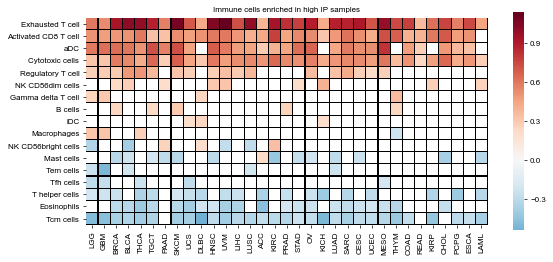

In [9]:
## Plotting the GSVA score |>0.2| having adj p values <0.1 and 
fig=plt.figure(figsize=(9,4))
res=sns.heatmap(GSVA_score_p_values_df3.T,linewidths=0.1, linecolor='black',center=0,square=True,rasterized=False,cmap="RdBu_r")
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 8)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 8)
plt.title('Immune cells enriched in high IP samples',fontsize=8)
#plt.savefig("plots/"+'Differential_immune_cells_high_low_IP_rev_v2_24223'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()

### Differentially expressed immune cells in High CP

In [10]:
os.chdir("data/r_output/")
diff_immune_gsva_score_info=[]
for  i in glob.glob("high_low_const_prtoeasome_Diff_immune_score*.csv"):
    diff_immune_gsva_score_info.append(i.split('_')[7].split('.')[0])

In [11]:
input_path2="data/r_output/"
all_tumor_immune_cells_df=pd.DataFrame()
for i in range(len(diff_immune_gsva_score_info)):
    diff_immune_cells_gsva_score=pd.read_csv(input_path2+'high_low_const_prtoeasome_Diff_immune_score_'+diff_immune_gsva_score_info[i]+'.csv',index_col='Unnamed: 0')
    diff_immune_cells_gsva_score=diff_immune_cells_gsva_score[['logFC','adj.P.Val']]
    tumor_name=diff_immune_gsva_score_info[i]
    diff_immune_cells_gsva_score=diff_immune_cells_gsva_score.rename(columns={'logFC':'logFC_'+tumor_name,'adj.P.Val':'adj.P.Val_'+tumor_name})
    all_tumor_immune_cells_df=pd.concat([all_tumor_immune_cells_df, diff_immune_cells_gsva_score], axis=1)


In [12]:
### Getting the GSVA score tumor tissue wise
GSVA_score_difference=all_tumor_immune_cells_df.T.iloc[::2]
GSVA_score_difference.index=GSVA_score_difference.index.str.split('_').str[1:2].str.join('.')

### Masking the score
mask3=(GSVA_score_difference>-0.2)&(GSVA_score_difference<0.2)
GSVA_score_difference[mask3]=np.nan

## Getting the p values
gsva_p_values=all_tumor_immune_cells_df.T.iloc[1:66:2]
gsva_p_values.index=gsva_p_values.index.str.split('_').str[1:2].str.join('.')

## masking the P value
mask1=gsva_p_values<0.1
mask2=gsva_p_values>0.1
gsva_p_values[mask1]=1
gsva_p_values[mask2]=np.nan

## getting only those values in the dataframe which has |>0.2| gsva score and adj p values<0.1
GSVA_score_p_values_df=pd.DataFrame(GSVA_score_difference.values*gsva_p_values.values, columns=GSVA_score_difference.columns, index=GSVA_score_difference.index)
GSVA_score_p_values_df.rename(columns = {"Exhaustive T cell": "Exhausted T cell"},inplace = True)

In [13]:
###oredring the rows and columns of the dataframe
index_list=['Gamma delta T cell','Activated CD8 T cell','Exhausted T cell','NK CD56dim cells','iDC','Cytotoxic cells','NK CD56bright cells',
 'Macrophages','Regulatory T cell','Neutrophils','T helper cells','B cells','Tem cells',
 'Mast cells','Eosinophils','Tfh cells','aDC','Tcm cells']
col_list=['LGG','GBM','BRCA','BLCA','THCA','TGCT','PAAD','SKCM','UCS','DLBC','HNSC','UVM','LIHC','LUSC',
                 'ACC','KIRC','PRAD','STAD','OV','KICH','LUAD','SARC','CESC','UCEC','MESO','THYM','COAD','READ',
                 'KIRP','CHOL','PCPG','ESCA','LAML']

In [14]:
GSVA_score_p_values_df1=GSVA_score_p_values_df
GSVA_score_p_values_df1=GSVA_score_p_values_df1.reindex(col_list)
GSVA_score_p_values_df2=GSVA_score_p_values_df1[index_list]

In [15]:
### Immune cells significantly up or down regulated in more than 2 tumor tissue types
df_tmp=pd.DataFrame(GSVA_score_p_values_df2.notnull().sum(axis = 0))
final_immune_cell_list=list(df_tmp[df_tmp[0]>2].index)
GSVA_score_p_values_df3=GSVA_score_p_values_df2[final_immune_cell_list]

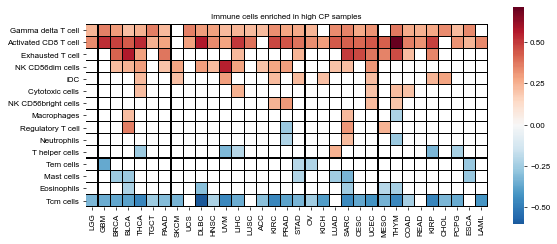

In [16]:
## Plotting the GSVA score |>0.2| having adj p values <0.1 and 
fig=plt.figure(figsize=(9,4))
res=sns.heatmap(GSVA_score_p_values_df3.T,linewidths=0.1, linecolor='black',center=0,square=True,rasterized=False,cmap="RdBu_r")
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 8)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 8)
plt.title('Immune cells enriched in high CP samples',fontsize=8)
#plt.savefig("plots/"+'Differential_immune_cells_high_low_CP_rev_v2_24223'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()

### Supplementary Table 3: Sample level GSVA score of 18 different immune across 33 tumour tisssue

In [17]:
## Extracting tumor file name containing immune cells GSVA score
os.chdir("data/r_output/")
immune_gsva_score_info=[]
for  i in glob.glob("GSVA_immune_cells*.tsv"):
    immune_gsva_score_info.append(i)

In [18]:
## Generating Supplementary Table 3 containg immune cells GSVA score across 33 tumor tissue samples.
input_path2="data/r_output/"
df_list={}
for i in range(33):
    immune_cells_gsva_score=pd.read_csv(input_path2+immune_gsva_score_info[i],sep="\t")
    immune_cells_gsva_score1=immune_cells_gsva_score.T
    immune_cells_gsva_score1['Tissue type']=immune_gsva_score_info[i].split("_")[3].split('.')[0]
    df_list[i]=immune_cells_gsva_score1

immune_cell_df=pd.concat(df_list)
with pd.ExcelWriter('supplementary_tables/TableS3.xlsx') as writer: 
    immune_cell_df.to_excel(writer, sheet_name='Sheet_name_1')